# Introduction

## System Overview
NetBrain Integrated Edition is a browser-based interface backed by a full-stack architecture, adopting advanced distributed technologies to support large-scale networks with more expansion possibilities.

The distributed system architecture is as follows:

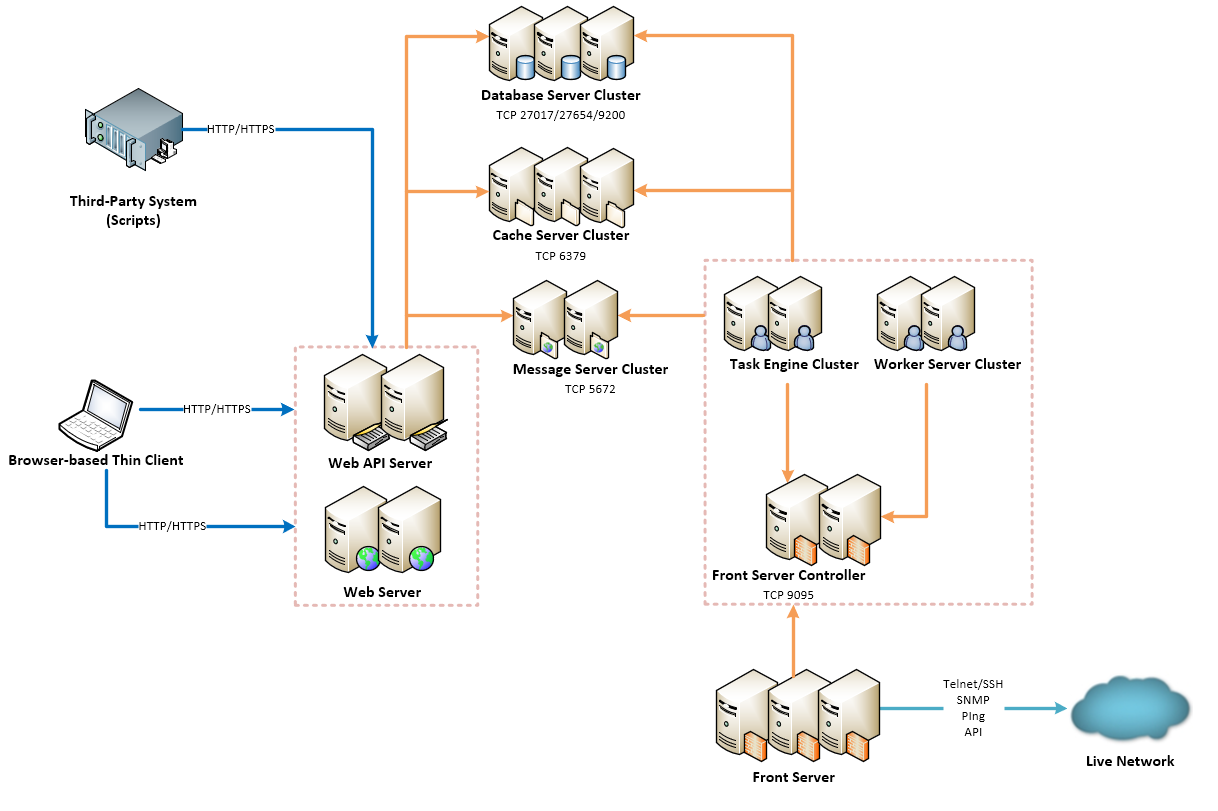

The system includes the following components:

>* **Browser-based** Thin Client — provides a user interface for end users to access the system.

>* **NetBrain Database Server**:
>>* **MongoDB Server** — serves as system data repository. High availability is supported by primary/secondary/arbiter nodes.
>>* **License Agent Server** — provides services that validate and activate licenses. It must be installed on all MongoDB Servers except arbiter node.
>>* **Index Server** — serves as a full-text search and analytics engine in a distributed multi-user environment. High availability is supported by master/master-only nodes.

>* **NetBrain Application Server**:
>>* **Web Server** — serves static content such as HTML, JavaScript and CSS resources, which serves as the user interface of the Thin Client. Multiple Web Servers can be installed and load-balanced under your load balancing infrastructure.
>>* **Web API Server** — provides the front-end web applications to support the browser-based Thin Clients, and serves RESTful API calls from third-party applications for integration. Multiple Web API Servers can be installed with Web Servers and load-balanced under your load balancing infrastructure.
>>* **Message Server** — prioritizes and forwards requested tasks. High availability is supported by master/slave nodes.
>>* **Cache Server** — provides memory cache for the system. High availability is supported by master/slave/sentinel nodes.
>>* **Worker Server** — serves as a resource manager to support computing tasks. It relies on both Cache Server and Message Server to work. Multiple Worker Servers can be installed and load balanced.
>>* **Task Engine** — coordinates computing tasks. High availability is supported by active/standby nodes.
>>* **Front Server Controller** — serves to coordinate and communicate with Front Servers and other components. High availability is supported by active/standby nodes.
>>* **Front Server** — serves as a polling server to collect and parse live network data. It is the only component required to access the live network. Multiple Front Servers can be installed and load balanced.

And two add-on components:
>* **Service Monitor Agent** — monitors the health of your NetBrain Servers with operations management of related services. It is highly recommended to install Service Monitor Agent on your NetBrain Servers that require monitoring.
>* **Update Server** — serves as a proxy to communicate with NetBrain Content Site and download the updates of built-in resources.

### Considerations for System Scalability
The following table introduces the considerations for system scalability:

|Server|Scalability|
|:-:|-|
|Web Server<br>Web API Server  |a) Deploying more Web Servers as per data center locations is recommended to ensure the response time for accessing web pages of Thin Client.<br>b) Deploying more Web API Servers is recommended when there is a large number of API calls for intensive API triggered diagnosis in large networks.|
|Worker Server  |Deploying more Worker Servers is recommended for a large number of back-end network automation tasks, such as network monitoring, path discovery, runbook execution, triggered diagnosis.  |
|Task Engine  |Supports high availability with active/standby nodes.  |
|Message Server  |Supports high availability with master/slave nodes.  |
|Cache Server  |Supports high availability with master/slave/sentinel nodes. |
|MongoDB Server  |Supports high availability with primary/secondary/arbiter nodes.  |
|Index Server |Supports high availability with master/master-only nodes.  |
|Front Server  |Deploying more Front Servers is recommended for a large number of network nodes. Each Front Server is recommended to manage at most 5,000 nodes.  |
|Front Server Controller  |Supports high availability with active/standby nodes.  |

**See also**:

>* [System Requirement][]
[System Requirement]: https://www.netbraintech.com/docs/ie71/help/index.html?system-requirement.htm

>* [How it Works][]
[How it Works]: https://www.netbraintech.com/docs/ie71/help/index.html?how-it-works.htm

>* [Getting Started][]
[Getting Started]: https://www.netbraintech.com/docs/ie71/help/index.html?getting-started-for-domain-users.htm

## System Requirements
This section introduces the hardware requirements, network connectivity requirements, and more prerequisites for deploying a two-server system.

### Reference Specification
The two-server deployment requires one Windows server for applications and one Linux server for the database. Both physical machines and virtual machines are supported.

|Environment|NetBrain Component|Machine Count|CPU|Memory|Hard Disk|Operating System|
|------|------|------|------|------|------|------|
|≤1000 nodes<br>≤10 users  |Application Server  |1  | 4 Core/<br>8 vCPU | 16GB | 200GB | Windows Server 2012/2012 R2(Standard/Datacenter Edition), 64-bit<br>Windows Server 2016 (Standard/Datacenter Edition), 64-bit|
|≤1000 nodes<br>≤10 users   |Database Server  |1  | 4 Core/<br>8 vCPU | 16GB | 300GB | Red Hat Enterprise Linux (RHEL) 7.0/7.3/7.5, 64-bit<br>CentOS 7.0/7.2, 64-bit |
|1001~2000 nodes<br>≤10 users  |Application Server  |1  | 4 Core/<br>8 vCPU | 32GB | 200GB | Windows Server 2012/2012 R2 (Standard/Datacenter Edition), 64-bit<br>Windows Server 2016 (Standard/Datacenter Edition), 64-bit |
|1001~2000 nodes<br>≤10 users  |Database Server  |1  | 4 Core/<br>8 vCPU | 32GB | 200GB | Red Hat Enterprise Linux (RHEL) 7.0/7.3/7.5, 64-bit<br>CentOS 7.0/7.2, 64-bit |

> **Notes:**
>* Hard Disk:  The required hard disk space must be exclusively reserved for NetBrain. For better performance, MongoDB Server is recommended to be installed on a machine equipped with Solid State Drive (SSD), or Hard Disk Drive (HDD) RAID-10.
>* Operation System: Individual Front Server is supported on both Linux and Windows Server, including 2008 R2 SP1, 64-bit.

### Network Connectivity Requirements
|Source|Destination|Protocol and Port Number|
|------|------|------|
|Thin Client  |Application Server  |HTTP/HTTPS  |
|Application Server  |Database Server  |TCP 27017/27654/9200  |
|Application Server  |Live Network  |ICMP/SNMP/Telnet/SSH/REST API  |


## Deployment Prerequisites
The following requirements must be satisfied before setting up your NetBrain system:
>* The operating system must be installed with an English-language version (not language packs).
>* When installing NetBrain servers, comply with your company security policy to set the passwords and archive them for further reference.
>* NetBrain servers use hostnames to identify and communicate with each other. Make sure each server has a unique hostname.
>* If the machine's firewall is turned on, make sure the firewall rules allow traffics to all the ports and protocols that will be used by NetBrain system.